In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(1)

In [2]:
#We first have to create the dataset that we are going to work with
num_of_samples = 500
dims = 2

#Generating random points of values between 0 to 1
class1 = np.random.rand(num_of_samples,dims)
#To add separability we will add a bias of 1.1
class2 = np.random.rand(num_of_samples,dims)+1.1

#Generating relevant labels for both classes
class_1_label = np.array([1 for n in range(num_of_samples)])
class_2_label = np.array([0 for n in range(num_of_samples)])
class_1_label.shape = (1, class_1_label.shape[0])
class_2_label.shape = (1, class_2_label.shape[0])

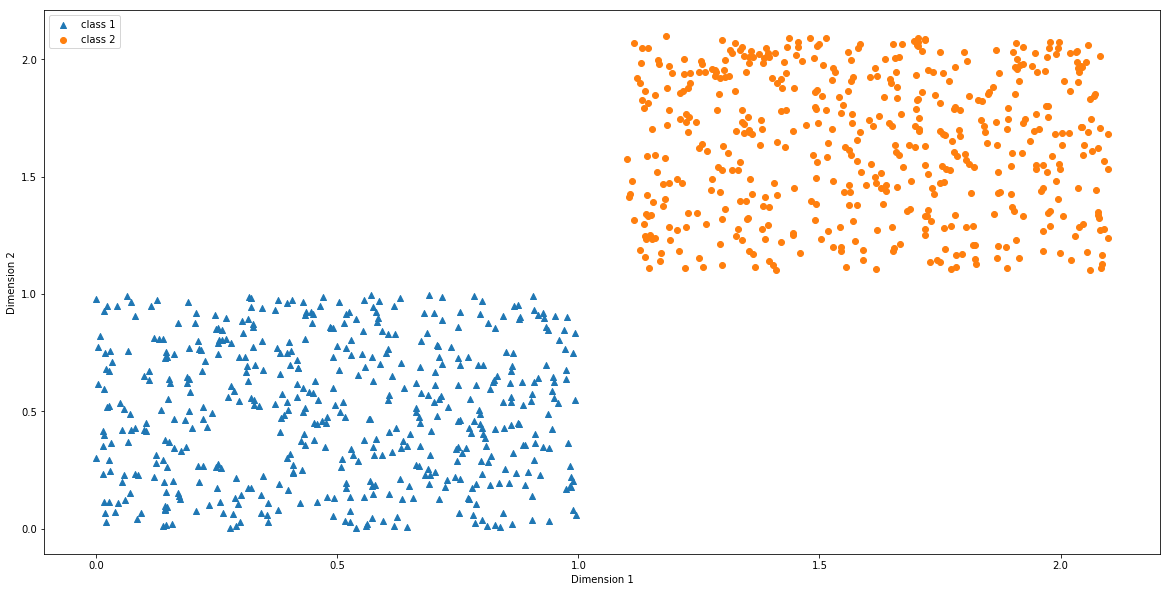

In [26]:
#Lets visualize the dataset
plt.figure(figsize=(20,10))
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()
#plt.savefig("./images/Task01/Dataset.png")

In [4]:
#Data spliting
#60% training, 20% validation, 20% test
train_page = int(0.6*num_of_samples)   #first 60%
val_page = train_page + int(0.2*num_of_samples)  #next 20%
test_page = val_page + int(0.2*num_of_samples)   #next 20%

# train data, first 300+300
train_X = class1[0: (train_page), :]
train_X = np.concatenate( (train_X,(class2[0: (train_page), :])), axis = 0)

train_Y = class_1_label[:, 0: (train_page)]
train_Y = np.concatenate( (train_Y,(class_2_label[:, 0: (train_page)])), axis = 1)

In [5]:
# validation data, next 100+100
val_X = class1[train_page: (val_page), :]
val_X = np.concatenate( (val_X, (class2[train_page: (val_page), :])), axis = 0)

val_Y = class_1_label[:, train_page: (val_page)]
val_Y = np.concatenate( (val_Y, (class_2_label[:, train_page: (val_page)])), axis = 1)

In [6]:
# test data, next 100+100
test_X = class1[val_page: (test_page), :]
test_X = np.concatenate( (test_X, (class2[val_page:test_page, :])), axis = 0)

test_Y = class_1_label[:, val_page: (test_page)]
test_Y = np.concatenate( (test_Y, (class_2_label[:, val_page: (test_page)])), axis = 1)

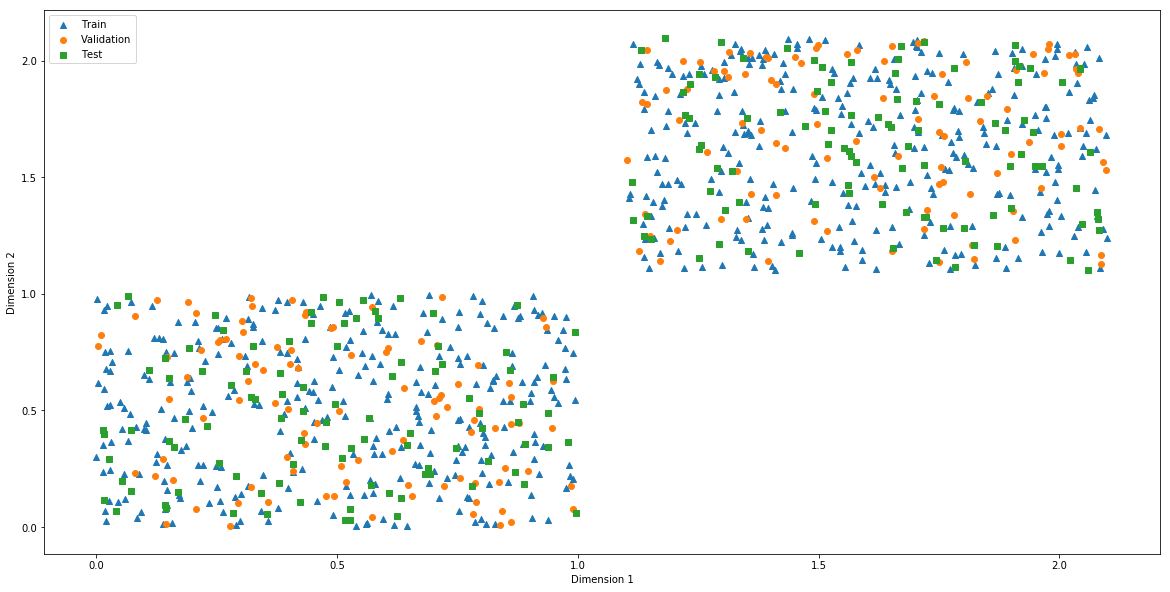

In [31]:
#Lets visualize the datasets
plt.figure(figsize=(20,10))
plt.scatter(train_X[:,0], train_X[:,1], marker='^', label="Train")
plt.scatter(val_X[:,0], val_X[:,1], marker='o', label="Validation")
plt.scatter(test_X[:,0], test_X[:,1], marker='s', label="Test")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()
#plt.savefig("./images/Task01/DatasetSplit.png")

In [8]:
#Noe Datasets are ready
Train_Data = {
    "X": train_X.T,
    "Y": train_Y
}

Validation_Data = {
    "X": val_X.T,
    "Y": val_Y
}

Test_Data = {
    "X": test_X.T,
    "Y": test_Y
}



In [9]:
#after spliting datasets information
print(Train_Data["X"].shape)
print(Validation_Data["X"].shape)
print(Test_Data["X"].shape)


print(Train_Data["Y"].shape)
print(Validation_Data["Y"].shape)
print(Test_Data["Y"].shape)


(2, 600)
(2, 200)
(2, 200)
(1, 600)
(1, 200)
(1, 200)


## Model Functions


In [10]:
def sigmoid (x):
    '''
    Parameters:
    x - input
    
    Returns:
    answer - The sigmoid vaue of 'x'
    '''
    answer = 1/(1 + np.exp(-x))
    return answer

In [11]:
def initializePerceptron (inputDimension, activation):
    '''
    Parameters:
    inputDimension = the dims of input vector
    activation     = the activation function to be used, sigmoid in this case

    Returns:
    Model = the class instance with 'w', 'b' and 'activation'
    '''
    Model = None
    
    w = np.random.rand(inputDimension, 1)*0.01
    b = np.zeros((1,1))
    
    Model = {
                "w": w,
                "b": b,
                "activation": activation
            }
    
    return Model

In [12]:
def  forwardPropagation (model, X):
    '''
    Parameters:
    model = perceptron class instance, where it is the model initialized using initializePerceptron
    X =     [[all dim1 vals], [all dim2 vals]]    i.e.inputs stacked vertically

    Returns:
    modelOutput = The class instance with 'x', 'z' and 'a' in it
    '''
    w = model["w"]
    b = model["b"]
    activation = model["activation"]
    
    z = np.dot(w.T, X) + b #the z values for all X
        
    if(activation == "sigmoid"):
        a = sigmoid(z)
    else:
        print("Activation function error")

    modelOutput = {
        "X": X,
        "z": z,
        "a": a
    }
    return modelOutput

In [13]:
def  lossCalculation(modelOutput, actual_target):
    '''
    Parameters:
    modelOutput = it is the output of the forward propagation of the model
    actual_target = Ground Truth for all the labels

    Returns:
    loss = The logistic cross entropy loss
    '''
    
    y = actual_target
    a = modelOutput["a"]
    m = a.shape[1]
    
    loss = -(1/m) * (np.sum((y*np.log(a))) + np.sum(((1-y)*np.log(1-a))))
    
    return loss

In [14]:
def  backprop(model, modelOutput, y_hat):
    '''
    Parameters:
    model : perceptron class instance (W, b, activation)
    modelOutput: output of forwardpropagation function
    y_hat: ground truth values
    
    Returns:
    gradient = The strcture with gradients (dL_dw, dL_db)
    '''
    X = modelOutput["X"]
    a = modelOutput["a"]
    z = modelOutput["z"]
    w = model["w"]
    b = model["b"]
    m = a.shape[1]
    
        
    dL_dz = a - y_hat
    
    dL_dw = (1/m)*(np.dot(X, dL_dz.T))
    
    dL_db = (1/m)*np.sum(dL_dz)
    
    gradient = {
        "dL_dw": dL_dw,
        "dL_db": dL_db
    }
    
    return gradient


In [15]:
def  weightUpdate (model, gradient, lr_rate):
    '''
    Parameters:
    model : perceptron class instance
    lr_rate : the lraning rate to be multiplied
    gradients : backprop function output
    
    Returns:
    model = perceptron class instance
    '''
    
    model["w"] = model["w"] - (lr_rate*gradient["dL_dw"])
    model["b"] = model["b"] - (lr_rate*gradient["dL_db"])
    
    return model


In [16]:
def trainModel( model, trainingData, ValidationData, numberOfEpochs, lr_rate = 0.01):
    '''
    Parameters:
    model : perceptron class instance
    trainingData : instance with ('X' and 'Y' stacked in it)
    ValidationData : instance with ('X' and 'Y' stacked in it)
    numberOfEpochs : int number
    lr_rate: learnign rate (int value)
    
    Returns:
    model = perceptron class instance
    '''
    train_X = trainingData["X"]
    train_Y = trainingData["Y"]
    
    val_X = ValidationData["X"]
    val_Y = ValidationData["Y"]
    
    All_Train_Loss = []
    All_Val_Loss = []
    
    
    for i in range(1, numberOfEpochs+1):        
        Trn_modelOutput = forwardPropagation(model, train_X)
        Trn_loss = lossCalculation(Trn_modelOutput, train_Y)
        All_Train_Loss.append(Trn_loss)
        
        Trn_gradient = backprop(model, Trn_modelOutput, train_Y)

        model = weightUpdate(model, Trn_gradient, lr_rate)
        
        Val_modelOutput = forwardPropagation(model, val_X)
        Val_loss = lossCalculation(Val_modelOutput, val_Y)
        All_Val_Loss.append(Val_loss)
        
        if((i%50 == 0) or (i in range(1, 10+1))):  #print for first 10, then after every 50
            print("epoch #"+ str(i) + ": \tTrain Loss = "+ str(Trn_loss) + "\t\t\t Validation Loss = " + str(Val_loss))
        
    
    return model, All_Train_Loss, All_Val_Loss


In [17]:
def evaluate_model(model, test_data, target ):
    '''
    Parameters:
    model : perceptron class instance
    test_data : input vector of test dataset
    target : Ground truth for test dateset
    
    Returns:
    accuracy, precision, recall, loss
    '''
    X = test_data
    Y = target
    
    modelOutput = forwardPropagation (model, X)
    
    predictions = modelOutput["a"] > 0.5
    predictions = predictions.astype(int)
    
    loss = lossCalculation(modelOutput, Y)
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(0, target.shape[1]):
        if((predictions[0, i] == 0) and (target[0, i] == 0)):
            TN = TN + 1
        elif((predictions[0, i] == 0) and (target[0, i] == 1)):
            FN = FN + 1
        elif((predictions[0, i] == 1) and (target[0, i] == 0)):
            FP = FP + 1
        elif((predictions[0, i] == 1) and (target[0, i] == 1)):
            TP = TP + 1
    
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+TN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    return accuracy, precision, recall, loss


## Usage of above function

In [18]:
Model = initializePerceptron(inputDimension = dims, activation = "sigmoid")
Model, TrainLosses, ValLosses = trainModel( Model, Train_Data, Validation_Data, 1000, lr_rate = 1.0)

epoch #1: 	Train Loss = 0.6972092346837898			 Validation Loss = 0.5937257844841016
epoch #2: 	Train Loss = 0.5955183889679131			 Validation Loss = 0.5605258160053281
epoch #3: 	Train Loss = 0.56269268185658			 Validation Loss = 0.5308525976811627
epoch #4: 	Train Loss = 0.5334221796007004			 Validation Loss = 0.5036918090028897
epoch #5: 	Train Loss = 0.5066768183433766			 Validation Loss = 0.4787912309098833
epoch #6: 	Train Loss = 0.48219193085437423			 Validation Loss = 0.45594050888877385
epoch #7: 	Train Loss = 0.4597512316261752			 Validation Loss = 0.43494454549037953
epoch #8: 	Train Loss = 0.4391563742563343			 Validation Loss = 0.41562410308745257
epoch #9: 	Train Loss = 0.4202260408633588			 Validation Loss = 0.3978161665752626
epoch #10: 	Train Loss = 0.4027957815980836			 Validation Loss = 0.38137348139003274
epoch #50: 	Train Loss = 0.15840780635825297			 Validation Loss = 0.14476951907632518
epoch #100: 	Train Loss = 0.09818758194265723			 Validation Loss = 0.08546294940

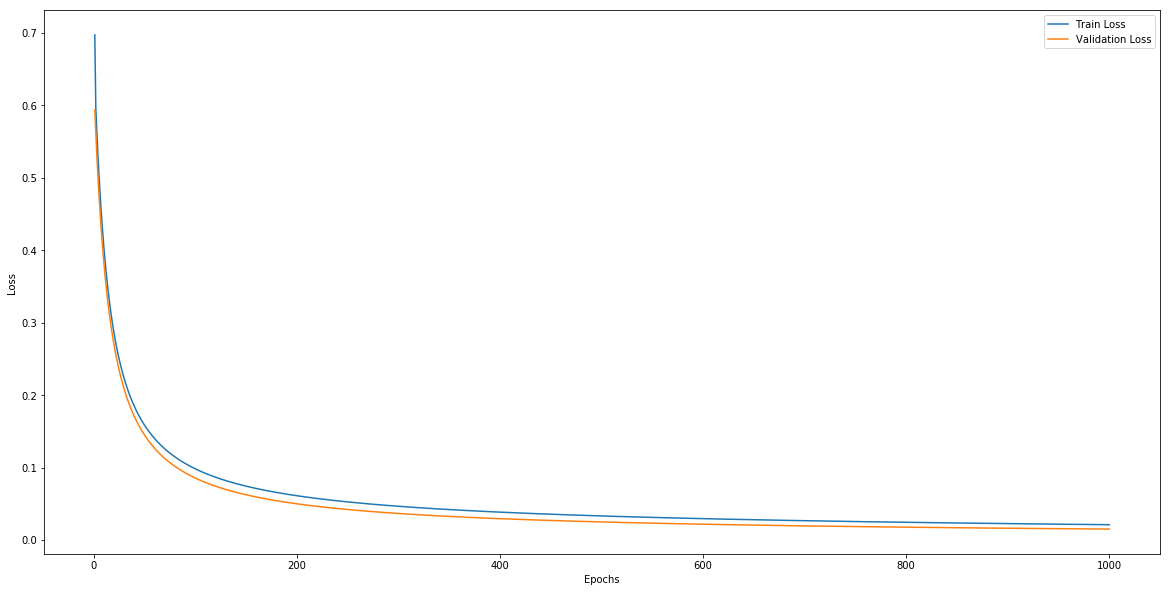

In [28]:
plt.figure(figsize=(20,10))
x1 = np.arange(1, len(TrainLosses)+1)
y1 = np.array(TrainLosses)
x1.shape = (x1.shape[0], 1)
y1.shape = (y1.shape[0], 1)

x2 = np.arange(1, len(ValLosses)+1)
y2 = np.array(ValLosses)
x2.shape = (x2.shape[0], 1)
y2.shape = (y2.shape[0], 1)


plt.plot(x1, y1, label="Train Loss")
plt.plot(x2, y2, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()
#plt.savefig("./images/Task01/LearningPlot.png")

In [20]:
accuracy, precision, recall, loss = evaluate_model(Model, Test_Data["X"], Test_Data["Y"])
print("Accuracy: \t" + str(accuracy))
print("Precision: \t" + str(precision))
print("Recall: \t" + str(recall))
print("Loss: \t\t" + str(loss))

Accuracy: 	1.0
Precision: 	1.0
Recall: 	0.5
Loss: 		0.015269865757395596


## Model Visualization

In [29]:
def visualize_model(model, class1, class2):
    w1 = model["w"][0]
    w2 = model["w"][1]
    b = model["b"]
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    line_y_coords = c * line_x_coords + d

    line_x_coords.shape = (1, line_x_coords.shape[0])
    
    plt.figure(figsize = (20, 10))
    plt.title("The line is represeting the learned boundary between class 1 and class 2 data")
    
    plt.plot(line_x_coords[0], line_y_coords[0], 'r-')
    plt.scatter(class1[:,0], class1[:,1], marker='^', label = "class 1")
    plt.scatter(class2[:,0], class2[:,1], marker='o', label = "class 2")
    plt.legend(loc='best')

    plt.show()
    #plt.savefig("./images/Task01/FinalVisual.png")

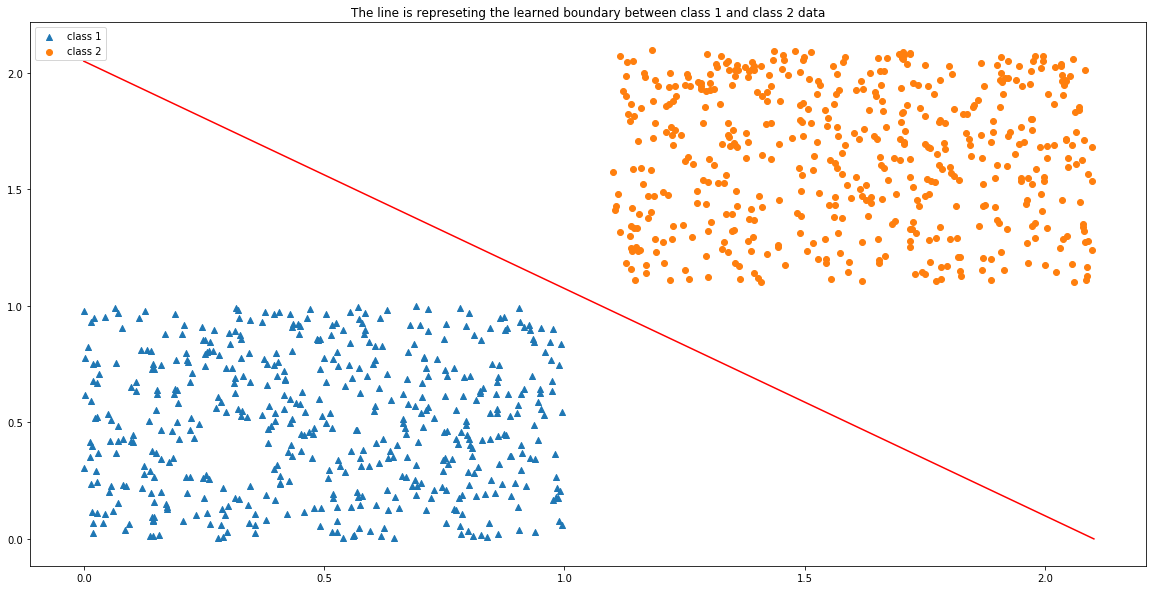

In [30]:
visualize_model(Model, class1, class2)